In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('/root/code/oscarthse/portfolio_manager/raw_data/AAPL_technical_analysis.csv')
aapl = pd.read_csv('/root/code/oscarthse/portfolio_manager/raw_data/AAPL.csv')

# Geometric Brownian Motion

In [79]:
aapl['4. close'][40000]

np.float64(10.424)

In [80]:
aapl['4. close'][40120]

np.float64(10.527)

In [81]:
log_returns = np.log(aapl['4. close'] / aapl['4. close'].shift(1))
log_returns[100000]

np.float64(0.007558971215233926)

In [110]:
last_data_point = 40000

mu = log_returns[35000:40000].mean()
sigma = log_returns[35000:40000].std()
n = 1000
T = 100
M= 10
S0 = aapl['4. close'][last_data_point]

In [111]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)

# Define time interval correctly
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

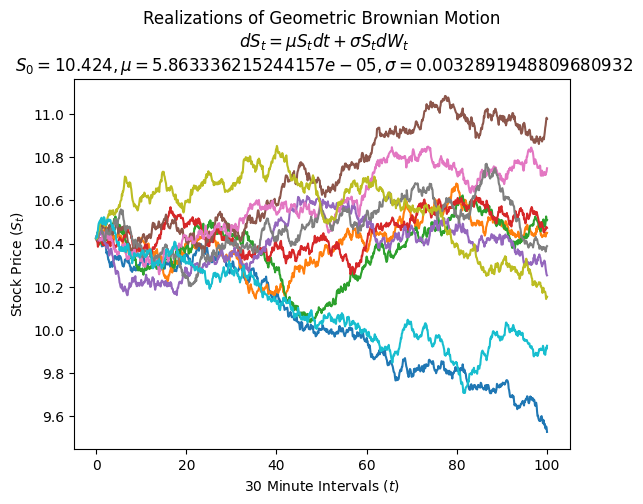

In [112]:
plt.plot(tt, St)
plt.xlabel("30 Minute Intervals $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()

In [85]:
St[-1].mean()

np.float64(10.474187729405894)

In [86]:
(St[0].mean())

np.float64(10.424000000000001)

In [87]:
St[-1].std()

np.float64(0.35512601472066463)

# Risk Calculations


## Value at Risk (VaR)
VaR gives you the worst expected loss at the given confidence level. For example, a 95% VaR of -2% means that there is a 5% chance the asset will lose more than 2% over the time the simulations ran.

In [103]:
def var(confidence_interval, simulations):
    simulations.sort()
    var = np.percentile(simulations[-1], 100 - confidence_interval)
    loss = (1 - var / simulations[0][0])*100
    return loss

In [104]:
var(95, St)

np.float64(5.311105981771647)

## Conditional Value at Risk (CVaR)
CVaR, also known as Expected Shortfall, measures the expected loss given that the loss is beyond the VaR threshold. It provides an average of the worst losses.

In [107]:
def cvar(simulations, confidence_interval):
    simulations.sort()
    var = np.percentile(simulations[-1], 100 - confidence_interval)
    cvar = simulations[simulations <= var].mean()
    loss = (1 - cvar/simulations[0][0]) * 100
    return loss
    

In [108]:
cvar(St, 95)

np.float64(6.060387492266051)

## Volatility
Volatility measures the standard deviation of returns, reflecting the overall variability or risk of the asset's price.

In [109]:
def volatility(simulations):
    return simulations[-1].std()

In [113]:
volatility(St)

np.float64(0.3878723665533443)

## Maximum Drawdown
Maximum Drawdown measures the largest peak-to-trough decline in the price path over the time horizon. It represents the worst loss an investor could experience during the period.

In [131]:
def max_drawdown(simulations):
    return np.min(simulations[-1] / np.maximum.accumulate(simulations[-1]) - 1)


In [133]:
max_drawdown(St)

np.float64(-0.09570497304298287)